In [2]:
# Purchase Probability
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle

from sklearn.linear_model import LogisticRegression 

import matplotlib.pyplot as plt
import matplotlib.axes as axs
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

In [4]:
# Data Preparation
df_purchase = pd.read_csv('purchase data.csv')

scaler = pickle.load(open('scaler.pickle', 'rb'))
pca = pickle.load(open('pca.pickle', 'rb'))
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))

features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

df_purchase_predictors = df_purchase.copy()
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca, prefix = 'Segment', prefix_sep = '_')
df_purchase_predictors = pd.concat([df_purchase_predictors, segment_dummies], axis = 1)

df_pa = df_purchase_predictors

In [5]:
df_pa

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,47,1,110866,1,0,0,1,0,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,0,1,0,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,0,1,0,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,47,1,110866,1,0,0,1,0,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,47,1,110866,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,42,1,120946,1,0,0,1,0,0,0
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,42,1,120946,1,0,0,1,0,0,0
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,42,1,120946,1,0,0,1,0,0,0
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,42,1,120946,1,0,0,1,0,0,0


In [6]:
# Purchase Probability Model
Y = df_pa['Incidence']

In [7]:
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] +
                   df_pa['Price_5'] ) / 5

In [8]:
model_purchase = LogisticRegression(solver = 'sag')
model_purchase.fit(X, Y)

LogisticRegression(solver='sag')

In [9]:
model_purchase.coef_

array([[-2.3477638]])

In [10]:
# Price Elasticity of Purchase Probability
df_pa[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [11]:
price_range = np.arange(0.5, 3.5, 0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [12]:
df_price_range = pd.DataFrame(price_range)

In [13]:
df_price_range

,0
0,0.50
1,0.51
2,0.52
3,0.53
4,0.54
...,...
295,3.45
296,3.46
297,3.47
298,3.48


In [14]:
Y_pr = model_purchase.predict_proba(df_price_range)
purchase_pr = Y_pr[:][:, 1]
pe = model_purchase.coef_[:, 0] * price_range * (1 - purchase_pr)

In [15]:
df_price_elasticities = pd.DataFrame(price_range)

In [16]:
df_price_elasticities = df_price_elasticities.rename(columns = {0: "Price_Point"})
df_price_elasticities['Mean_PE'] = pe
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096448
1,0.51,-0.100518
2,0.52,-0.104714
3,0.53,-0.109041
4,0.54,-0.113502
...,...,...
295,3.45,-8.011893
296,3.46,-8.037139
297,3.47,-8.062351
298,3.48,-8.087530


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

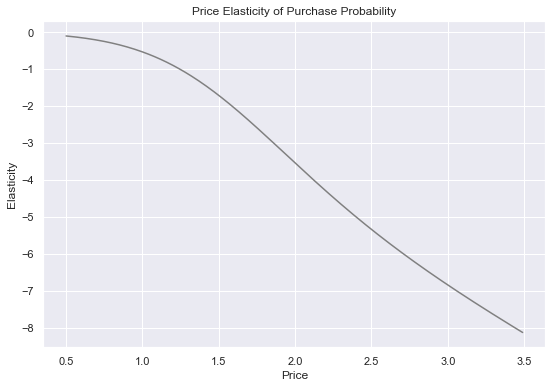

In [17]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

In [18]:
#  	Elasticity measures percent change on output variable-purchase probability, 
# given the percent change of our variable-price. 
# $1.25 is the mark of inelastic and elastic, from $0.5 - $1.25, it is inelastic, 
# we can increase our product price without losing too much in purchase probability.
# For price higher than $1.25, it is elastic, we can reduce price.

In [19]:
# Purchase Probability by Segments
# Career-Focused
df_pa_segment_1 = df_pa[df_pa['Segment'] == 1]

In [20]:
Y = df_pa_segment_1['Incidence']

In [21]:
X = pd.DataFrame()

In [22]:
X['Mean_Price'] = (df_pa_segment_1['Price_1'] + 
                   df_pa_segment_1['Price_2'] + 
                   df_pa_segment_1['Price_3'] + 
                   df_pa_segment_1['Price_4'] + 
                   df_pa_segment_1['Price_5']) / 5

In [23]:
model_incidence_segment_1 = LogisticRegression(solver = 'sag')
model_incidence_segment_1.fit(X, Y)

LogisticRegression(solver='sag')

In [24]:
model_incidence_segment_1.coef_

array([[-1.72317593]])

In [25]:
Y_segment_1 = model_incidence_segment_1.predict_proba(df_price_range)
purchase_pr_segment_1 = Y_segment_1[:][:, 1]
pe_segment_1 = model_incidence_segment_1.coef_[:, 0] * price_range * (1 - purchase_pr_segment_1)

In [26]:
df_price_elasticities['PE_Segment_1'] = pe_segment_1

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

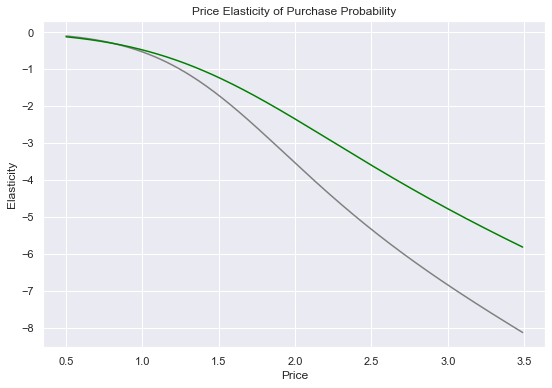

In [27]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

In [28]:
# Standard
df_pa_segment_2 = df_pa[df_pa['Segment'] == 2]

In [29]:
Y = df_pa_segment_2['Incidence']

X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_2['Price_1'] + 
                   df_pa_segment_2['Price_2'] + 
                   df_pa_segment_2['Price_3'] + 
                   df_pa_segment_2['Price_4'] + 
                   df_pa_segment_2['Price_5']) / 5

model_incidence_segment2 = LogisticRegression(solver = 'sag')
model_incidence_segment2.fit(X, Y)

model_incidence_segment2.coef_
Y_segment_2 = model_incidence_segment2.predict_proba(df_price_range)
purchase_pr_segment2 = Y_segment_2[:][: , 1]
pe_segment2 = model_incidence_segment2.coef_[:,0] * price_range * ( 1- purchase_pr_segment2)

In [30]:
df_price_elasticities['PE_Segment_2'] = pe_segment2

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

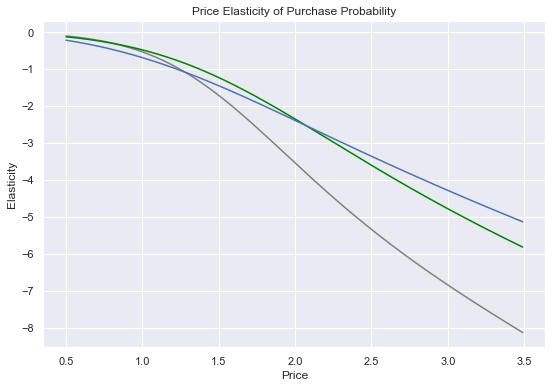

In [31]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment2, color = 'b')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

In [32]:
# Fewer-Oppotunity
df_pa_segment_0 = df_pa[df_pa['Segment'] == 0]

Y = df_pa_segment_0['Incidence']

X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_0['Price_1'] + 
                   df_pa_segment_0['Price_2'] + 
                   df_pa_segment_0['Price_3'] + 
                   df_pa_segment_0['Price_4'] + 
                   df_pa_segment_0['Price_5']) / 5

model_incidence_segment0 = LogisticRegression(solver = 'sag')
model_incidence_segment0.fit(X, Y)

model_incidence_segment0.coef_
Y_segment_0 = model_incidence_segment0.predict_proba(df_price_range)
purchase_pr_segment0 = Y_segment_0[:][: , 1]
pe_segment0 = model_incidence_segment0.coef_[:,0] * price_range *( 1- purchase_pr_segment0)
df_price_elasticities.insert(2, column = 'PE_Segment_0', value = pe_segment0)

In [33]:
# Well-Off
df_pa_segment_3 = df_pa[df_pa['Segment'] == 3]

Y = df_pa_segment_3['Incidence']

X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_3['Price_1'] + 
                   df_pa_segment_3['Price_2'] + 
                   df_pa_segment_3['Price_3'] + 
                   df_pa_segment_3['Price_4'] + 
                   df_pa_segment_3['Price_5']) / 5

model_incidence_segment3 = LogisticRegression(solver = 'sag')
model_incidence_segment3.fit(X, Y)

model_incidence_segment3.coef_
Y_segment_3 = model_incidence_segment3.predict_proba(df_price_range)
purchase_pr_segment3 = Y_segment_3[:][: , 1]
pe_segment3 = model_incidence_segment3.coef_[:,0] * price_range *( 1- purchase_pr_segment3)
df_price_elasticities['PE_Segment_3'] = pe_segment3
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3
0,0.50,-0.096448,-0.032260,-0.118732,-0.211184,-0.165152
1,0.51,-0.100518,-0.034090,-0.122917,-0.217755,-0.170068
2,0.52,-0.104714,-0.036009,-0.127196,-0.224433,-0.175058
3,0.53,-0.109041,-0.038022,-0.131571,-0.231220,-0.180121
4,0.54,-0.113502,-0.040131,-0.136043,-0.238116,-0.185259
...,...,...,...,...,...,...
295,3.45,-8.011893,-12.414316,-5.722993,-5.051643,-4.160703
296,3.46,-8.037139,-12.450883,-5.743245,-5.068499,-4.176031
297,3.47,-8.062351,-12.487434,-5.763460,-5.085336,-4.191340
298,3.48,-8.087530,-12.523967,-5.783638,-5.102154,-4.206632


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

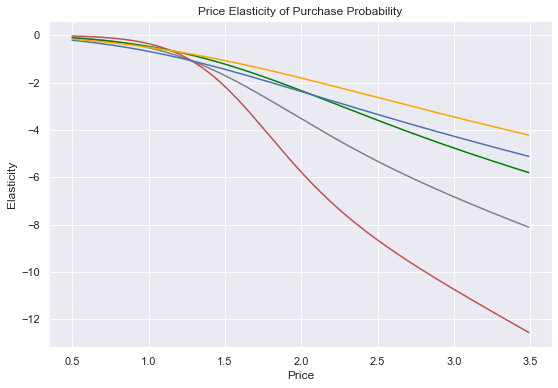

In [34]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment0, color = 'r')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment2, color = 'b')
plt.plot(price_range, pe_segment3, color = 'orange')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

In [35]:
# Fewer-opportunity segment is more price sensitive compare to average, 
# a lot more sensitive compare to career-focused. The line is not only lower but much steeper.

In [36]:
# Purchase Probability with Promotion Feature
Y = df_pa['Incidence']

In [37]:
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] + 
                   df_pa['Price_2'] + 
                   df_pa['Price_3'] + 
                   df_pa['Price_4'] + 
                   df_pa['Price_5']) / 5

In [38]:
X['Mean_Promotion'] = (df_pa['Promotion_1'] +
                       df_pa['Promotion_2'] +
                       df_pa['Promotion_3'] +
                       df_pa['Promotion_4'] +
                       df_pa['Promotion_5'] ) / 5
X.head()

,Mean_Price,Mean_Promotion
0,2.044,0.2
1,2.028,0.0
2,2.028,0.0
3,2.028,0.0
4,2.030,0.0


In [39]:
# Model estimation
model_incidence_promotion = LogisticRegression(solver = 'sag')
model_incidence_promotion.fit(X, Y)
model_incidence_promotion.coef_

array([[-1.49404658,  0.56143942]])

In [40]:
# Price Elasticity with Promotion
df_price_elasticity_promotion = pd.DataFrame(price_range)
df_price_elasticity_promotion = df_price_elasticity_promotion.rename(columns = {0: "Price_Range"})

In [41]:
df_price_elasticity_promotion['Promotion'] = 1

In [42]:
Y_promotion = model_incidence_promotion.predict_proba(df_price_elasticity_promotion)

In [43]:
promo = Y_promotion[:, 1]
price_elasticity_promo = (model_incidence_promotion.coef_[:, 0] * price_range) * (1 - promo)

In [44]:
df_price_elasticities['Elasticity_Promotion_1'] = price_elasticity_promo
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1
0,0.50,-0.096448,-0.032260,-0.118732,-0.211184,-0.165152,-0.125740
1,0.51,-0.100518,-0.034090,-0.122917,-0.217755,-0.170068,-0.129857
2,0.52,-0.104714,-0.036009,-0.127196,-0.224433,-0.175058,-0.134052
3,0.53,-0.109041,-0.038022,-0.131571,-0.231220,-0.180121,-0.138327
4,0.54,-0.113502,-0.040131,-0.136043,-0.238116,-0.185259,-0.142684
...,...,...,...,...,...,...,...
295,3.45,-8.011893,-12.414316,-5.722993,-5.051643,-4.160703,-4.861723
296,3.46,-8.037139,-12.450883,-5.743245,-5.068499,-4.176031,-4.879925
297,3.47,-8.062351,-12.487434,-5.763460,-5.085336,-4.191340,-4.898096
298,3.48,-8.087530,-12.523967,-5.783638,-5.102154,-4.206632,-4.916237


In [45]:
# Price Elasticity without Promotion
df_price_elasticity_promotion_no = pd.DataFrame(price_range)
df_price_elasticity_promotion_no = df_price_elasticity_promotion_no.rename(columns = {0: "Price_Range"})

In [46]:
df_price_elasticity_promotion_no['Promotion'] = 0

In [47]:
Y_no_promo = model_incidence_promotion.predict_proba(df_price_elasticity_promotion_no)

In [48]:
no_promo = Y_no_promo[: , 1]

In [49]:
price_elasticity_no_promo = model_incidence_promotion.coef_[:, 0] * price_range *(1- no_promo)

In [50]:
df_price_elasticities['Elasticity_Promotion_0'] = price_elasticity_no_promo

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability with and without Promotion')

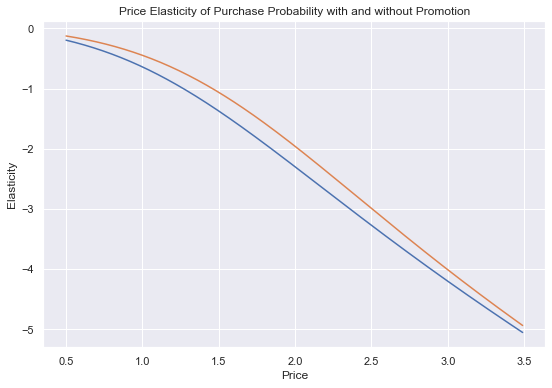

In [51]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_no_promo)
plt.plot(price_range, price_elasticity_promo)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability with and without Promotion')

In [52]:
# Without promotion the inelasticity price ends up at 1.27, with promotion ends 1.46, that is difference almost 20 
# cents. People are more willing to buy products with promotional prices, customers are less price sensitive to 
# price changes when there are promotion activities. It would be more beneficial to have a higher original price 
# and constant promotion.

In [53]:
# Brand Choice
brand_choice = df_pa[df_pa['Incidence'] == 1]

In [54]:
pd.options.display.max_rows = 100
brand_choice

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,0,1,0,0,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,0,1,0,0,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,0,1,0,0,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,0,1,0,0,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,42,1,120946,1,0,0,1,0,0,0
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,42,1,120946,1,0,0,1,0,0,0
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,42,1,120946,1,0,0,1,0,0,0
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,42,1,120946,1,0,0,1,0,0,0


In [55]:
Y = brand_choice['Brand']

In [56]:
brand_choice.columns.values

array(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3'], dtype=object)

In [57]:
features = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
X = brand_choice[features]

In [58]:
model_brand_choice = LogisticRegression(solver = 'sag', multi_class = 'multinomial')
model_brand_choice.fit(X, Y)

LogisticRegression(multi_class='multinomial', solver='sag')

In [59]:
model_brand_choice.coef_

array([[-3.91593965,  0.65846942,  2.417789  ,  0.70409715, -0.20208765],
       [ 1.27461769, -1.8798525 , -0.21262867, -0.20633634,  0.58787723],
       [ 1.6241537 ,  0.56209148,  0.50076291,  1.03948145,  0.45274449],
       [ 0.57454295,  0.39559083, -1.4005884 , -1.24623908,  0.24935863],
       [ 0.44262531,  0.26370078, -1.30533483, -0.29100318, -1.08789269]])

In [60]:
bc_coef = pd.DataFrame(model_brand_choice.coef_)
bc_coef

,0,1,2,3,4
0,-3.915940,0.658469,2.417789,0.704097,-0.202088
1,1.274618,-1.879852,-0.212629,-0.206336,0.587877
2,1.624154,0.562091,0.500763,1.039481,0.452744
3,0.574543,0.395591,-1.400588,-1.246239,0.249359
4,0.442625,0.263701,-1.305335,-0.291003,-1.087893


In [61]:
bc_coef = pd.DataFrame(np.transpose(model_brand_choice.coef_))
coefficients = ['Coef_Brand_1', 'Coef_Brand_2', 'Coef_Brand_3', 'Coef_Brand_4', 'Coef_Brand_5']
bc_coef.columns = [coefficients]
prices = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-3.92,1.27,1.62,0.57,0.44
Price_2,0.66,-1.88,0.56,0.40,0.26
Price_3,2.42,-0.21,0.50,-1.40,-1.31
Price_4,0.70,-0.21,1.04,-1.25,-0.29
Price_5,-0.20,0.59,0.45,0.25,-1.09


In [62]:
# Own Price elasticity Brand 5
df_own_brand_5 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand_5['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand_5['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand_5['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand_5['Price_5'] = price_range
df_own_brand_5

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,2.159658,0.50
1,1.384559,1.764717,2.006694,2.159658,0.51
2,1.384559,1.764717,2.006694,2.159658,0.52
3,1.384559,1.764717,2.006694,2.159658,0.53
4,1.384559,1.764717,2.006694,2.159658,0.54
...,...,...,...,...,...
295,1.384559,1.764717,2.006694,2.159658,3.45
296,1.384559,1.764717,2.006694,2.159658,3.46
297,1.384559,1.764717,2.006694,2.159658,3.47
298,1.384559,1.764717,2.006694,2.159658,3.48


In [63]:
predict_brand_5 = model_brand_choice.predict_proba(df_own_brand_5)

In [64]:
pr_own_brand_5 = predict_brand_5[: ][:, 4]

In [65]:
beta5 = bc_coef.iloc[4, 4]
beta5

-1.09

In [66]:
own_price_elasticity_brand_5 = beta5 * price_range * (1 - pr_own_brand_5)

In [67]:
df_price_elasticities['Brand_5'] = own_price_elasticity_brand_5
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5
0,0.50,-0.096448,-0.032260,-0.118732,-0.211184,-0.165152,-0.125740,-0.195644,-0.049055
1,0.51,-0.100518,-0.034090,-0.122917,-0.217755,-0.170068,-0.129857,-0.201765,-0.050616
2,0.52,-0.104714,-0.036009,-0.127196,-0.224433,-0.175058,-0.134052,-0.207989,-0.052206
3,0.53,-0.109041,-0.038022,-0.131571,-0.231220,-0.180121,-0.138327,-0.214316,-0.053827
4,0.54,-0.113502,-0.040131,-0.136043,-0.238116,-0.185259,-0.142684,-0.220747,-0.055477
5,0.55,-0.118099,-0.042342,-0.140613,-0.245122,-0.190472,-0.147122,-0.227284,-0.057158
6,0.56,-0.122835,-0.044658,-0.145283,-0.252239,-0.195760,-0.151643,-0.233925,-0.058870
7,0.57,-0.127716,-0.047085,-0.150055,-0.259467,-0.201125,-0.156248,-0.240674,-0.060614
8,0.58,-0.132742,-0.049627,-0.154930,-0.266808,-0.206566,-0.160938,-0.247530,-0.062390
9,0.59,-0.137919,-0.052289,-0.159910,-0.274261,-0.212084,-0.165714,-0.254493,-0.064199


Text(0.5, 1.0, 'Own Price Elasticity of Purchase Probability for Brand 5')

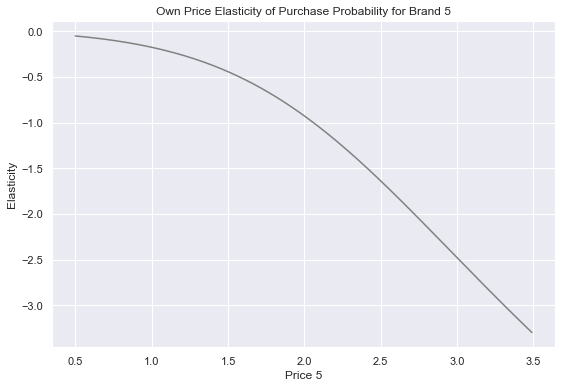

In [68]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, own_price_elasticity_brand_5, color = 'grey')
plt.xlabel('Price 5')
plt.ylabel('Elasticity')
plt.title('Own Price Elasticity of Purchase Probability for Brand 5')

In [69]:
# Cross Price Elasticity Brand 5, Cross Brand 4
df_brand5_cross_brand4 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4['Price_1'] = brand_choice['Price_1'].mean()
df_brand5_cross_brand4['Price_2'] = brand_choice['Price_2'].mean()
df_brand5_cross_brand4['Price_3'] = brand_choice['Price_3'].mean()
df_brand5_cross_brand4['Price_4'] = price_range
df_brand5_cross_brand4['Price_5'] = brand_choice['Price_5'].mean()

In [70]:
df_brand5_cross_brand4.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,0.50,2.654296
1,1.384559,1.764717,2.006694,0.51,2.654296
2,1.384559,1.764717,2.006694,0.52,2.654296
3,1.384559,1.764717,2.006694,0.53,2.654296
4,1.384559,1.764717,2.006694,0.54,2.654296


In [71]:
predict_brand5_cross_brand4 = model_brand_choice.predict_proba(df_brand5_cross_brand4)

In [72]:
predict_brand5_cross_brand4

array([[0.00996319, 0.16384112, 0.00386835, 0.60919521, 0.21313213],
       [0.01011849, 0.16488699, 0.00394185, 0.60674154, 0.21431113],
       [0.01027594, 0.16593508, 0.00401664, 0.6042815 , 0.21549085],
       ...,
       [0.22461072, 0.24724543, 0.2361323 , 0.04189272, 0.25011884],
       [0.22567891, 0.24616982, 0.23805234, 0.04127897, 0.24881997],
       [0.22674286, 0.24508881, 0.23997812, 0.04067254, 0.24751767]])

In [73]:
pr_brand_4 = predict_brand5_cross_brand4[:][:, 3]

In [74]:
beta5

-1.09

In [75]:
brand5_cross_brand4_price_elasticity = -beta5 * price_range * pr_brand_4

In [76]:
df_price_elasticities['Brand_5_Cross_Brand_4'] = brand5_cross_brand4_price_elasticity
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4
0,0.50,-0.096448,-0.032260,-0.118732,-0.211184,-0.165152,-0.125740,-0.195644,-0.049055,0.332011
1,0.51,-0.100518,-0.034090,-0.122917,-0.217755,-0.170068,-0.129857,-0.201765,-0.050616,0.337288
2,0.52,-0.104714,-0.036009,-0.127196,-0.224433,-0.175058,-0.134052,-0.207989,-0.052206,0.342507
3,0.53,-0.109041,-0.038022,-0.131571,-0.231220,-0.180121,-0.138327,-0.214316,-0.053827,0.347669
4,0.54,-0.113502,-0.040131,-0.136043,-0.238116,-0.185259,-0.142684,-0.220747,-0.055477,0.352773
5,0.55,-0.118099,-0.042342,-0.140613,-0.245122,-0.190472,-0.147122,-0.227284,-0.057158,0.357820
6,0.56,-0.122835,-0.044658,-0.145283,-0.252239,-0.195760,-0.151643,-0.233925,-0.058870,0.362809
7,0.57,-0.127716,-0.047085,-0.150055,-0.259467,-0.201125,-0.156248,-0.240674,-0.060614,0.367741
8,0.58,-0.132742,-0.049627,-0.154930,-0.266808,-0.206566,-0.160938,-0.247530,-0.062390,0.372614
9,0.59,-0.137919,-0.052289,-0.159910,-0.274261,-0.212084,-0.165714,-0.254493,-0.064199,0.377430


Text(0.5, 1.0, 'Cross Price Elasticity of Brand 5 wrt to Brand 4')

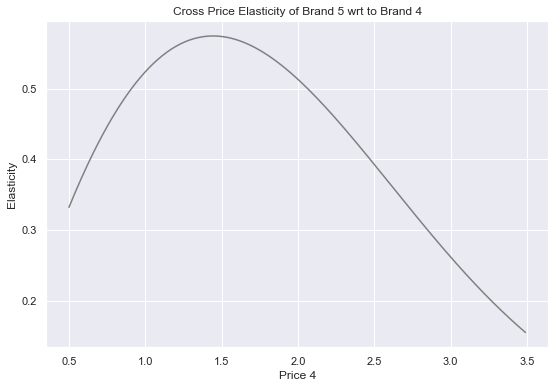

In [77]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, brand5_cross_brand4_price_elasticity, color = 'grey')
plt.xlabel('Price 4')
plt.ylabel('Elasticity')
plt.title('Cross Price Elasticity of Brand 5 wrt to Brand 4')

In [78]:
# Brand 4 price is from$1.76-2.26, between this range, our brand 5 purchase probability still increase with the 
# increase of brand 4's price, but at slower rate. Brand 4 is a weak substitute of brand 5.

In [79]:
# Own and Cross-Price Elasticity by Segment
# Well-off
brand_choice_s3 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s3 = brand_choice_s3[brand_choice_s3['Segment'] == 3]

pd.options.display.max_rows = 100
brand_choice_s3

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
101,200000002,6,1,4,1,0,0,1.59,1.87,2.01,...,52,2,159052,2,1,3,0,0,0,1
115,200000002,100,1,4,2,0,0,1.47,1.90,1.95,...,52,2,159052,2,1,3,0,0,0,1
138,200000002,283,1,4,3,0,0,1.37,1.89,2.00,...,52,2,159052,2,1,3,0,0,0,1
141,200000002,307,1,4,1,0,0,1.34,1.89,2.01,...,52,2,159052,2,1,3,0,0,0,1
153,200000002,422,1,4,1,0,0,1.34,1.89,2.02,...,52,2,159052,2,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57346,200000489,687,1,4,1,4,1,1.50,1.87,2.06,...,44,2,193816,2,1,3,0,0,0,1
57347,200000489,693,1,4,2,4,1,1.42,1.51,2.02,...,44,2,193816,2,1,3,0,0,0,1
57348,200000489,701,1,4,3,4,1,1.42,1.85,1.99,...,44,2,193816,2,1,3,0,0,0,1
57350,200000489,715,1,4,2,0,0,1.50,1.80,2.09,...,44,2,193816,2,1,3,0,0,0,1


In [80]:
# model estimation
Y = brand_choice_s3['Brand']
brand_choice_s3 = pd.get_dummies(brand_choice_s3, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s3[features]
model_brand_choice_s3 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s3.fit(X, Y)

#coefficients table for segment 3
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s3.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-2.15,1.33,0.78,0.13,-0.10
Price_2,-0.95,-1.37,1.24,0.79,0.29
Price_3,2.00,-1.66,-0.41,-0.01,0.09
Price_4,2.52,0.95,-0.20,-1.92,-1.34
Price_5,-1.00,-0.30,1.18,0.56,-0.44


In [81]:
# Own-Brand Price Elasticity
df_own_brand_5_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_own_brand_5_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_own_brand_5_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_own_brand_5_s3['Price_4'] = brand_choice_s3['Price_4'].mean()
df_own_brand_5_s3['Price_5'] = price_range

predict_own_brand_5_s3 = model_brand_choice_s3.predict_proba(df_own_brand_5_s3)
pr_own_brand_5_s3 = predict_own_brand_5_s3[: ][: , 4]

own_price_elasticity_brand_5_s3 =  beta5 * price_range * (1 - pr_own_brand_5_s3)
df_price_elasticities['Brand 5 S3'] = own_price_elasticity_brand_5_s3

In [82]:
# Cross Brand Price Elasticity
df_brand5_cross_brand4_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_brand5_cross_brand4_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_brand5_cross_brand4_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_brand5_cross_brand4_s3['Price_4'] = price_range
df_brand5_cross_brand4_s3['Price_5'] = brand_choice_s3['Price_5'].mean()

predict_brand5_cross_brand4_s3 = model_brand_choice_s3.predict_proba(df_brand5_cross_brand4_s3)
pr_cross_brand_5_s3 = predict_brand5_cross_brand4_s3[: ][: , 3]

brand5_cross_brand4_price_elasticity_s3 = -beta5 * price_range * pr_cross_brand_5_s3
df_price_elasticities['Brand_5_Cross_Brand_4_S3'] = brand5_cross_brand4_price_elasticity_s3
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S3,Brand_5_Cross_Brand_4_S3
0,0.50,-0.096448,-0.032260,-0.118732,-0.211184,-0.165152,-0.125740,-0.195644,-0.049055,0.332011,-0.298430,0.482873
1,0.51,-0.100518,-0.034090,-0.122917,-0.217755,-0.170068,-0.129857,-0.201765,-0.050616,0.337288,-0.304488,0.492185
2,0.52,-0.104714,-0.036009,-0.127196,-0.224433,-0.175058,-0.134052,-0.207989,-0.052206,0.342507,-0.310557,0.501481
3,0.53,-0.109041,-0.038022,-0.131571,-0.231220,-0.180121,-0.138327,-0.214316,-0.053827,0.347669,-0.316636,0.510762
4,0.54,-0.113502,-0.040131,-0.136043,-0.238116,-0.185259,-0.142684,-0.220747,-0.055477,0.352773,-0.322725,0.520026
5,0.55,-0.118099,-0.042342,-0.140613,-0.245122,-0.190472,-0.147122,-0.227284,-0.057158,0.357820,-0.328825,0.529275
6,0.56,-0.122835,-0.044658,-0.145283,-0.252239,-0.195760,-0.151643,-0.233925,-0.058870,0.362809,-0.334937,0.538507
7,0.57,-0.127716,-0.047085,-0.150055,-0.259467,-0.201125,-0.156248,-0.240674,-0.060614,0.367741,-0.341061,0.547723
8,0.58,-0.132742,-0.049627,-0.154930,-0.266808,-0.206566,-0.160938,-0.247530,-0.062390,0.372614,-0.347197,0.556923
9,0.59,-0.137919,-0.052289,-0.159910,-0.274261,-0.212084,-0.165714,-0.254493,-0.064199,0.377430,-0.353345,0.566106


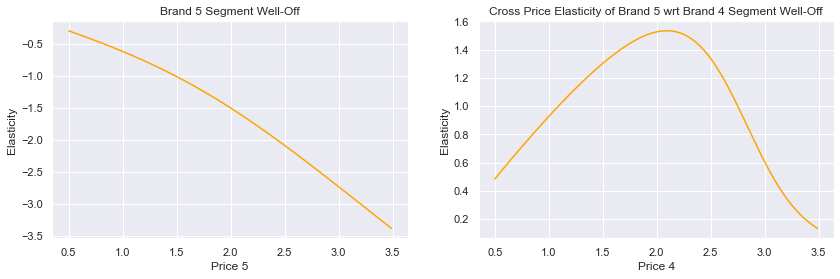

In [83]:
fig, axs = plt.subplots(1, 2, figsize = (14, 4))
axs[0].plot(price_range, own_price_elasticity_brand_5_s3, color = 'orange')
axs[0].set_title('Brand 5 Segment Well-Off')
axs[0].set_xlabel('Price 5')

axs[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, color = 'orange')
axs[1].set_title('Cross Price Elasticity of Brand 5 wrt Brand 4 Segment Well-Off')
axs[1].set_xlabel('Price 4')

for ax in axs.flat:
    ax.set(ylabel = 'Elasticity')

In [84]:
# Fewer Oppotunities
brand_choice_s0 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s0 = brand_choice_s0[brand_choice_s0['Segment'] == 0]
brand_choice_s0.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,0,1,0,0,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,0,1,0,0,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,0,1,0,0,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,0,1,0,0,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,0,1,0,0,0


In [85]:
Y = brand_choice_s0['Brand']
brand_choice_s0 = pd.get_dummies(brand_choice_s0, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s0[features]
model_brand_choice_s0 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 200)
model_brand_choice_s0.fit(X, Y)

bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s0.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

/Users/leilei/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [86]:
# Own brand price elasticity
df_own_brand_5_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_own_brand_5_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_own_brand_5_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_own_brand_5_s0['Price_4'] = brand_choice_s0['Price_4'].mean()
df_own_brand_5_s0['Price_5'] = price_range

predict_own_brand_5_s0 = model_brand_choice_s0.predict_proba(df_own_brand_5_s0)
pr_own_brand_5_s0 = predict_own_brand_5_s0[: ][: , 4]

own_price_elasticity_brand_5_s0 =  beta5 * price_range * (1 - pr_own_brand_5_s0)
df_price_elasticities.insert(10, column = 'Brand 5 S0', value = own_price_elasticity_brand_5_s0)

In [87]:
# Cross brand price elasticity
df_brand5_cross_brand4_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_brand5_cross_brand4_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_brand5_cross_brand4_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_brand5_cross_brand4_s0['Price_4'] = price_range
df_brand5_cross_brand4_s0['Price_5'] = brand_choice_s0['Price_5'].mean()

predict_brand5_cross_brand4_s0 = model_brand_choice_s0.predict_proba(df_brand5_cross_brand4_s0)
pr_cross_brand_5_s0 = predict_brand5_cross_brand4_s0[: ][: , 3]

brand5_cross_brand4_price_elasticity_s0 = -beta5 * price_range * pr_cross_brand_5_s0
df_price_elasticities.insert(11, column = 'Brand_5_Cross_Brand_4_S0', value = brand5_cross_brand4_price_elasticity_s0)


In [88]:
# Career focused
brand_choice_s1 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s1 = brand_choice_s1[brand_choice_s1['Segment'] == 1]

In [89]:
Y = brand_choice_s1['Brand']
brand_choice_s1 = pd.get_dummies(brand_choice_s1, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s1[features]
model_brand_choice_s1 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s1.fit(X, Y)

bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s1.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

In [90]:
# Own brand price elasticity
df_own_brand_5_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_own_brand_5_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_own_brand_5_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_own_brand_5_s1['Price_4'] = brand_choice_s1['Price_4'].mean()
df_own_brand_5_s1['Price_5'] = price_range

predict_own_brand_5_s1 = model_brand_choice_s1.predict_proba(df_own_brand_5_s1)
pr_own_brand_5_s1 = predict_own_brand_5_s1[: ][: , 4]

own_price_elasticity_brand_5_s1 =  beta5 * price_range * (1 - pr_own_brand_5_s1)
df_price_elasticities.insert(12, column = 'Brand 5 S1', value = own_price_elasticity_brand_5_s1)

In [91]:
# Cross brand price elasticity
df_brand5_cross_brand4_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_brand5_cross_brand4_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_brand5_cross_brand4_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_brand5_cross_brand4_s1['Price_4'] = price_range
df_brand5_cross_brand4_s1['Price_5'] = brand_choice_s1['Price_5'].mean()

predict_brand5_cross_brand4_s1 = model_brand_choice_s1.predict_proba(df_brand5_cross_brand4_s1)
pr_cross_brand_5_s1 = predict_brand5_cross_brand4_s1[: ][: , 3]

brand5_cross_brand4_price_elasticity_s1 = -beta5 * price_range * pr_cross_brand_5_s1
df_price_elasticities.insert(13, column = 'Brand_5_Cross_Brand_4_S1', value = brand5_cross_brand4_price_elasticity_s1)

In [92]:
# Standard
brand_choice_s2 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s2 = brand_choice_s2[brand_choice_s2['Segment'] == 2]

In [93]:
Y = brand_choice_s2['Brand']
brand_choice_s2 = pd.get_dummies(brand_choice_s2, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s2[features]
model_brand_choice_s2 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s2.fit(X, Y)

bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s2.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

In [94]:
# Own Brand price elasticity
df_own_brand_5_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_own_brand_5_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_own_brand_5_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_own_brand_5_s2['Price_4'] = brand_choice_s2['Price_4'].mean()
df_own_brand_5_s2['Price_5'] = price_range

predict_own_brand_5_s2 = model_brand_choice_s2.predict_proba(df_own_brand_5_s2)
pr_own_brand_5_s2 = predict_own_brand_5_s2[: ][: , 4]

own_price_elasticity_brand_5_s2 =  beta5 * price_range * (1 - pr_own_brand_5_s2)
df_price_elasticities.insert(14, column = 'Brand 5 S2', value = own_price_elasticity_brand_5_s2)

In [95]:
# Cross brand price elasticity
df_brand5_cross_brand4_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_brand5_cross_brand4_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_brand5_cross_brand4_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_brand5_cross_brand4_s2['Price_4'] = price_range
df_brand5_cross_brand4_s2['Price_5'] = brand_choice_s2['Price_5'].mean()

predict_brand5_cross_brand4_s2 = model_brand_choice_s2.predict_proba(df_brand5_cross_brand4_s2)
pr_cross_brand_5_s2 = predict_brand5_cross_brand4_s2[: ][: , 3]

brand5_cross_brand4_price_elasticity_s2 = -beta5 * price_range * pr_cross_brand_5_s2
df_price_elasticities.insert(15, column = 'Brand_5_Cross_Brand_4_S2', value = brand5_cross_brand4_price_elasticity_s2)
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand 5 S3,Brand_5_Cross_Brand_4_S3
0,0.50,-0.096448,-0.032260,-0.118732,-0.211184,-0.165152,-0.125740,-0.195644,-0.049055,0.332011,-0.001042,0.172743,-0.039242,0.196462,-0.115837,0.174123,-0.298430,0.482873
1,0.51,-0.100518,-0.034090,-0.122917,-0.217755,-0.170068,-0.129857,-0.201765,-0.050616,0.337288,-0.001104,0.175012,-0.040244,0.198957,-0.118876,0.176179,-0.304488,0.492185
2,0.52,-0.104714,-0.036009,-0.127196,-0.224433,-0.175058,-0.134052,-0.207989,-0.052206,0.342507,-0.001170,0.177238,-0.041255,0.201400,-0.121950,0.178184,-0.310557,0.501481
3,0.53,-0.109041,-0.038022,-0.131571,-0.231220,-0.180121,-0.138327,-0.214316,-0.053827,0.347669,-0.001239,0.179420,-0.042277,0.203792,-0.125059,0.180137,-0.316636,0.510762
4,0.54,-0.113502,-0.040131,-0.136043,-0.238116,-0.185259,-0.142684,-0.220747,-0.055477,0.352773,-0.001311,0.181559,-0.043308,0.206133,-0.128204,0.182041,-0.322725,0.520026
5,0.55,-0.118099,-0.042342,-0.140613,-0.245122,-0.190472,-0.147122,-0.227284,-0.057158,0.357820,-0.001387,0.183655,-0.044349,0.208423,-0.131385,0.183894,-0.328825,0.529275
6,0.56,-0.122835,-0.044658,-0.145283,-0.252239,-0.195760,-0.151643,-0.233925,-0.058870,0.362809,-0.001467,0.185708,-0.045401,0.210662,-0.134602,0.185698,-0.334937,0.538507
7,0.57,-0.127716,-0.047085,-0.150055,-0.259467,-0.201125,-0.156248,-0.240674,-0.060614,0.367741,-0.001552,0.187718,-0.046462,0.212852,-0.137857,0.187452,-0.341061,0.547723
8,0.58,-0.132742,-0.049627,-0.154930,-0.266808,-0.206566,-0.160938,-0.247530,-0.062390,0.372614,-0.001640,0.189686,-0.047534,0.214991,-0.141149,0.189158,-0.347197,0.556923
9,0.59,-0.137919,-0.052289,-0.159910,-0.274261,-0.212084,-0.165714,-0.254493,-0.064199,0.377430,-0.001734,0.191611,-0.048616,0.217082,-0.144479,0.190815,-0.353345,0.566106


Text(0.5, 0, 'Price 4')

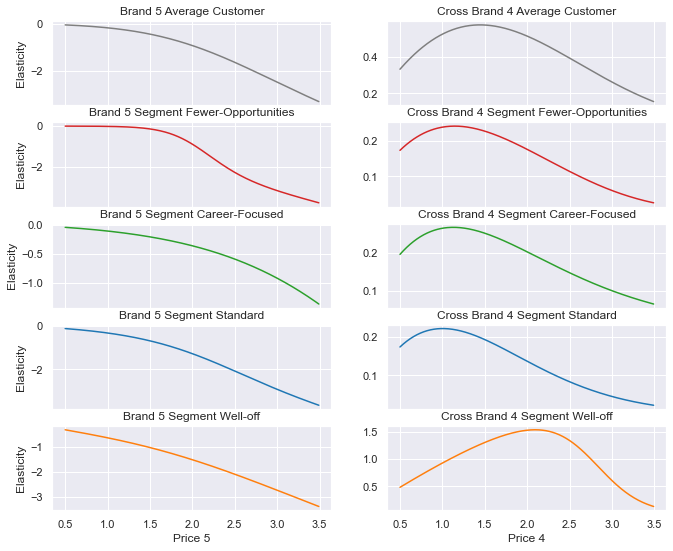

In [97]:
fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 2, figsize = (11, 9), sharex = True)
ax1[0].plot(price_range, own_price_elasticity_brand_5, 'tab:grey')
ax1[0].set_title('Brand 5 Average Customer')
ax1[0].set_ylabel('Elasticity')
ax1[1].plot(price_range, brand5_cross_brand4_price_elasticity, 'tab:grey')
ax1[1].set_title('Cross Brand 4 Average Customer')


ax2[0].plot(price_range, own_price_elasticity_brand_5_s0, 'tab:red')
ax2[0].set_title('Brand 5 Segment Fewer-Opportunities')
ax2[0].set_ylabel('Elasticity')
ax2[1].plot(price_range, brand5_cross_brand4_price_elasticity_s0, 'tab:red')
ax2[1].set_title('Cross Brand 4 Segment Fewer-Opportunities')

ax3[0].plot(price_range, own_price_elasticity_brand_5_s1, 'tab:green')
ax3[0].set_title('Brand 5 Segment Career-Focused')
ax3[0].set_ylabel('Elasticity')
ax3[1].plot(price_range, brand5_cross_brand4_price_elasticity_s1, 'tab:green')
ax3[1].set_title('Cross Brand 4 Segment Career-Focused')

ax4[0].plot(price_range, own_price_elasticity_brand_5_s2, 'tab:blue')
ax4[0].set_title('Brand 5 Segment Standard')
ax4[0].set_ylabel('Elasticity')
ax4[1].plot(price_range, brand5_cross_brand4_price_elasticity_s2, 'tab:blue')
ax4[1].set_title('Cross Brand 4 Segment Standard')

ax5[0].plot(price_range, own_price_elasticity_brand_5_s3, 'tab:orange')
ax5[0].set_title('Brand 5 Segment Well-off')
ax5[0].set_xlabel('Price 5')
ax5[0].set_ylabel('Elasticity')
ax5[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, 'tab:orange')
ax5[1].set_title('Cross Brand 4 Segment Well-off')
ax5[1].set_xlabel('Price 4')

### Price Elasticity of Purchase Quantity

In [98]:
df_purchase_quantity = df_pa[df_pa['Incidence'] == 1]
df_purchase_quantity.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,0,1,0,0,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,0,1,0,0,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,0,1,0,0,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,0,1,0,0,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,0,1,0,0,0


In [99]:
df_purchase_quantity = pd.get_dummies(df_purchase_quantity, columns = ['Brand'], prefix = 'Brand', prefix_sep = '_')
df_purchase_quantity.describe()

,ID,Day,Incidence,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Segment,Segment_0,Segment_1,Segment_2,Segment_3,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
count,1.463800e+04,14638.000000,14638.0,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,...,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000
mean,2.000003e+08,359.607597,1.0,2.774559,1.535251,0.406955,1.384559,1.764717,2.006694,2.159658,...,1.341235,0.294303,0.300314,0.175229,0.230154,0.092226,0.310288,0.057453,0.199959,0.340074
std,1.423786e+02,205.346253,0.0,1.796736,2.060858,0.491283,0.090944,0.181667,0.046200,0.093253,...,1.128625,0.455744,0.458410,0.380176,0.420946,0.289354,0.462627,0.232714,0.399983,0.473750
min,2.000000e+08,1.000000,1.0,1.000000,0.000000,0.000000,1.100000,1.260000,1.870000,1.760000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000001e+08,175.000000,1.0,2.000000,0.000000,0.000000,1.340000,1.570000,1.970000,2.120000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000003e+08,355.000000,1.0,2.000000,0.000000,0.000000,1.390000,1.880000,2.010000,2.180000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000004e+08,532.000000,1.0,3.000000,4.000000,1.000000,1.470000,1.890000,2.060000,2.240000,...,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,2.000005e+08,727.000000,1.0,15.000000,5.000000,1.000000,1.590000,1.900000,2.140000,2.260000,...,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
df_purchase_quantity.columns.values

array(['ID', 'Day', 'Incidence', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3', 'Brand_1',
       'Brand_2', 'Brand_3', 'Brand_4', 'Brand_5'], dtype=object)

In [101]:
df_purchase_quantity['Price_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Price_1'] +
                                           df_purchase_quantity['Brand_2'] * df_purchase_quantity['Price_2'] +
                                           df_purchase_quantity['Brand_3'] * df_purchase_quantity['Price_3'] +
                                           df_purchase_quantity['Brand_4'] * df_purchase_quantity['Price_4'] +
                                           df_purchase_quantity['Brand_5'] * df_purchase_quantity['Price_5'] )

In [102]:
df_purchase_quantity['Promotion_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Promotion_1'] +
                                               df_purchase_quantity['Brand_2'] * df_purchase_quantity['Promotion_2'] +
                                               df_purchase_quantity['Brand_3'] * df_purchase_quantity['Promotion_3'] +
                                               df_purchase_quantity['Brand_4'] * df_purchase_quantity['Promotion_4'] +
                                               df_purchase_quantity['Brand_5'] * df_purchase_quantity['Promotion_5'] )

In [103]:
# Linear Regression
X = df_purchase_quantity[['Price_Incidence', 'Promotion_Incidence']]
pd.options.display.max_rows = 100

In [104]:
Y = df_purchase_quantity['Quantity']
Y.head()

6     2
11    1
19    2
24    1
29    3
Name: Quantity, dtype: int64

In [105]:
model_quantity = LinearRegression()
model_quantity.fit(X, Y)

LinearRegression()

In [106]:
model_quantity.coef_

array([-0.8173651 , -0.10504673])

In [107]:
# price elasticity Estimation
df_price_elasticity_quantity = pd.DataFrame(index = np.arange(price_range.size))
df_price_elasticity_quantity['Price_Incidence'] = price_range
df_price_elasticity_quantity['Promotion_Incidence'] = 1

In [108]:
beta_quantity = model_quantity.coef_[0]
beta_quantity

-0.8173651016684991

In [109]:
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)

In [110]:
price_elasticity_quantity_promotion_yes = beta_quantity * price_range / predict_quantity

In [111]:
df_price_elasticities['PE_Quantity_Promotion_1'] = price_elasticity_quantity_promotion_yes
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand 5 S3,Brand_5_Cross_Brand_4_S3,PE_Quantity_Promotion_1
0,0.50,-0.096448,-0.032260,-0.118732,-0.211184,-0.165152,-0.125740,-0.195644,-0.049055,0.332011,-0.001042,0.172743,-0.039242,0.196462,-0.115837,0.174123,-0.298430,0.482873,-0.102157
1,0.51,-0.100518,-0.034090,-0.122917,-0.217755,-0.170068,-0.129857,-0.201765,-0.050616,0.337288,-0.001104,0.175012,-0.040244,0.198957,-0.118876,0.176179,-0.304488,0.492185,-0.104413
2,0.52,-0.104714,-0.036009,-0.127196,-0.224433,-0.175058,-0.134052,-0.207989,-0.052206,0.342507,-0.001170,0.177238,-0.041255,0.201400,-0.121950,0.178184,-0.310557,0.501481,-0.106679
3,0.53,-0.109041,-0.038022,-0.131571,-0.231220,-0.180121,-0.138327,-0.214316,-0.053827,0.347669,-0.001239,0.179420,-0.042277,0.203792,-0.125059,0.180137,-0.316636,0.510762,-0.108954
4,0.54,-0.113502,-0.040131,-0.136043,-0.238116,-0.185259,-0.142684,-0.220747,-0.055477,0.352773,-0.001311,0.181559,-0.043308,0.206133,-0.128204,0.182041,-0.322725,0.520026,-0.111238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.011893,-12.414316,-5.722993,-5.051643,-4.160703,-4.861723,-4.983311,-3.231570,0.162237,-3.746045,0.028579,-1.319094,0.068695,-3.592457,0.024052,-3.331947,0.153529,-1.774292
296,3.46,-8.037139,-12.450883,-5.743245,-5.068499,-4.176031,-4.879925,-5.000217,-3.247764,0.160337,-3.757486,0.028049,-1.329298,0.068081,-3.606362,0.023696,-3.345276,0.148218,-1.788634
297,3.47,-8.062351,-12.487434,-5.763460,-5.085336,-4.191340,-4.898096,-5.017104,-3.263926,0.158451,-3.768908,0.027526,-1.339558,0.067471,-3.620222,0.023344,-3.358602,0.143070,-1.803124
298,3.48,-8.087530,-12.523967,-5.783638,-5.102154,-4.206632,-4.916237,-5.033970,-3.280056,0.156579,-3.780310,0.027012,-1.349875,0.066866,-3.634038,0.022997,-3.371925,0.138081,-1.817766


Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotion')

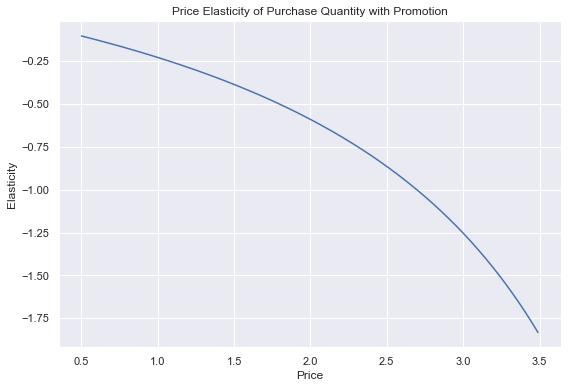

In [112]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')

In [113]:
df_price_elasticity_quantity['Promotion_Incidence'] = 0

predict_quantity = model_quantity.predict(df_price_elasticity_quantity)

price_elasticity_quantity_promotion_no = beta_quantity * price_range / predict_quantity

df_price_elasticities['PE_Quantity_Promotion_0'] = price_elasticity_quantity_promotion_no
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand 5 S3,Brand_5_Cross_Brand_4_S3,PE_Quantity_Promotion_1,PE_Quantity_Promotion_0
0,0.50,-0.096448,-0.032260,-0.118732,-0.211184,-0.165152,-0.125740,-0.195644,-0.049055,0.332011,-0.001042,0.172743,-0.039242,0.196462,-0.115837,0.174123,-0.298430,0.482873,-0.102157,-0.099543
1,0.51,-0.100518,-0.034090,-0.122917,-0.217755,-0.170068,-0.129857,-0.201765,-0.050616,0.337288,-0.001104,0.175012,-0.040244,0.198957,-0.118876,0.176179,-0.304488,0.492185,-0.104413,-0.101736
2,0.52,-0.104714,-0.036009,-0.127196,-0.224433,-0.175058,-0.134052,-0.207989,-0.052206,0.342507,-0.001170,0.177238,-0.041255,0.201400,-0.121950,0.178184,-0.310557,0.501481,-0.106679,-0.103939
3,0.53,-0.109041,-0.038022,-0.131571,-0.231220,-0.180121,-0.138327,-0.214316,-0.053827,0.347669,-0.001239,0.179420,-0.042277,0.203792,-0.125059,0.180137,-0.316636,0.510762,-0.108954,-0.106150
4,0.54,-0.113502,-0.040131,-0.136043,-0.238116,-0.185259,-0.142684,-0.220747,-0.055477,0.352773,-0.001311,0.181559,-0.043308,0.206133,-0.128204,0.182041,-0.322725,0.520026,-0.111238,-0.108369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.011893,-12.414316,-5.722993,-5.051643,-4.160703,-4.861723,-4.983311,-3.231570,0.162237,-3.746045,0.028579,-1.319094,0.068695,-3.592457,0.024052,-3.331947,0.153529,-1.774292,-1.664290
296,3.46,-8.037139,-12.450883,-5.743245,-5.068499,-4.176031,-4.879925,-5.000217,-3.247764,0.160337,-3.757486,0.028049,-1.329298,0.068081,-3.606362,0.023696,-3.345276,0.148218,-1.788634,-1.677205
297,3.47,-8.062351,-12.487434,-5.763460,-5.085336,-4.191340,-4.898096,-5.017104,-3.263926,0.158451,-3.768908,0.027526,-1.339558,0.067471,-3.620222,0.023344,-3.358602,0.143070,-1.803124,-1.690246
298,3.48,-8.087530,-12.523967,-5.783638,-5.102154,-4.206632,-4.916237,-5.033970,-3.280056,0.156579,-3.780310,0.027012,-1.349875,0.066866,-3.634038,0.022997,-3.371925,0.138081,-1.817766,-1.703414


Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotion')

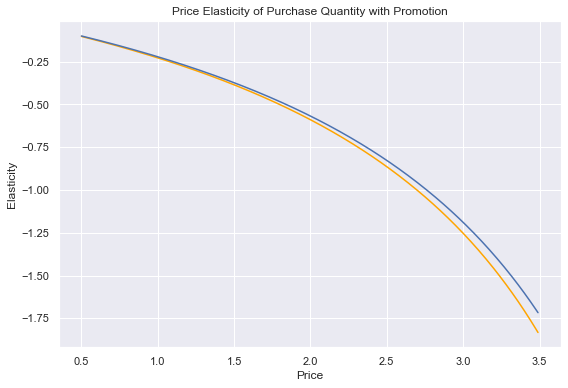

In [114]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes, color = 'orange')
plt.plot(price_range, price_elasticity_quantity_promotion_no)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')